# Linear Regression Modeling


1. Linear Regression

2. Logistic Regression



# Linear Regression

In [1]:
#source: https://vitalflux.com/linear-regression-explained-python-sklearn-examples/
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
#
# Load the Sklearn Boston Dataset
#
boston_ds = datasets.load_boston()
X = boston_ds.data
y = boston_ds.target
#
# Create a training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#
# Fit a pipeline using Training dataset and related labels
#
pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train, y_train)
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
#
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 22.545, test: 21.517
R^2 train: 0.743, test: 0.711


In [2]:
#source: https://realpython.com/linear-regression-in-python/
# Simple / Single independant Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")

coefficient of determination: 0.715875613747954
intercept: 5.633333333333329
slope: [0.54]
predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [3]:
#Multiple Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression

x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_}")

y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

x_new = np.arange(10).reshape((-1, 2))
print(x_new)
y_new = model.predict(x_new)
print(y_new)



coefficient of determination: 0.8615939258756775
intercept: 5.52257927519819
coefficients: [0.44706965 0.25502548]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


In [4]:
# Polynomial Regression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)

x_ = transformer.transform(x)

x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

model = LinearRegression().fit(x_, y)

x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)
model = LinearRegression(fit_intercept=False).fit(x_, y)
r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_}")

y_pred = model.predict(x_)
print(f"predicted response:\n{y_pred}")


coefficient of determination: 0.8908516262498565
intercept: 0.0
coefficients: [21.37232143 -1.32357143  0.02839286]
predicted response:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


In [5]:
>>> # Step 1: Import packages and classes
>>> import numpy as np
>>> from sklearn.linear_model import LinearRegression
>>> from sklearn.preprocessing import PolynomialFeatures

>>> # Step 2a: Provide data
>>> x = [
...   [0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]
... ]
>>> y = [4, 5, 20, 14, 32, 22, 38, 43]
>>> x, y = np.array(x), np.array(y)

>>> # Step 2b: Transform input data
>>> x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

>>> # Step 3: Create a model and fit it
>>> model = LinearRegression().fit(x_, y)

>>> # Step 4: Get results
>>> r_sq = model.score(x_, y)
>>> intercept, coefficients = model.intercept_, model.coef_

>>> # Step 5: Predict response
>>> y_pred = model.predict(x_)

>>> print(f"coefficient of determination: {r_sq}")

>>> print(f"intercept: {intercept}")

>>> print(f"coefficients:\n{coefficients}")

>>> print(f"predicted response:\n{y_pred}")


coefficient of determination: 0.9453701449127822
intercept: 0.8430556452395734
coefficients:
[ 2.44828275  0.16160353 -0.15259677  0.47928683 -0.4641851 ]
predicted response:
[ 0.54047408 11.36340283 16.07809622 15.79139    29.73858619 23.50834636
 39.05631386 41.92339046]


In [6]:
#Advanced Linear Regression With statsmodels
>>> import numpy as np
>>> import statsmodels.api as sm
>>> x = [ [0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35] ]
>>> y = [4, 5, 20, 14, 32, 22, 38, 43]
>>> x, y = np.array(x), np.array(y)
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

>>> print(f"coefficient of determination: {results.rsquared}")


>>> print(f"adjusted coefficient of determination: {results.rsquared_adj}")


>>> print(f"regression coefficients: {results.params}")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Sat, 18 Jun 2022   Prob (F-statistic):            0.00713
Time:                        18:45:20   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


______________________________________________________________________________________________________________________________

# Logistic Regression

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [8]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
print(model.classes_)
print(model.intercept_)
print(model.coef_)

model.predict_proba(x)
model.predict(x)
model.score(x, y)

[0 1]
[-1.04608067]
[[0.51491375]]


0.9

In [9]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

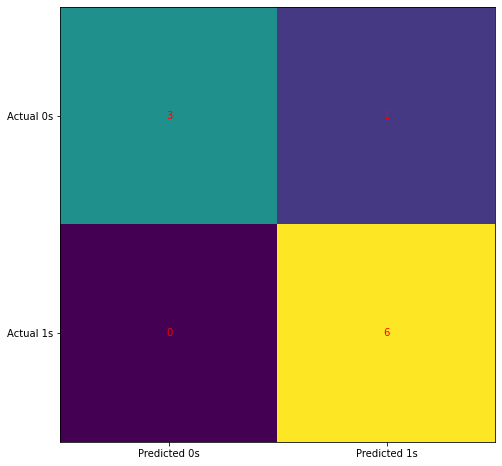

In [10]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [11]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [12]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [13]:
print(model.intercept_)
print(model.coef_)
model.predict_proba(x)

[-3.51335372]
[[1.12066084]]


array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [14]:
model.score(x, y)

1.0

In [15]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [16]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [17]:
# Step 1: Import packages, functions, and classes
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Get data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

# Step 4: Evaluate the model
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [18]:
print('x:', x, sep='\n')
print('y:', y, sep='\n', end='\n\n')
print('intercept:', model.intercept_)
print('coef:', model.coef_, end='\n\n')
print('p_pred:', p_pred, sep='\n', end='\n\n')
print('y_pred:', y_pred, end='\n\n')
print('score_:', score_, end='\n\n')
print('conf_m:', conf_m, sep='\n', end='\n\n')
print('report:', report, sep='\n')

x:
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
y:
[0 1 0 0 1 1 1 1 1 1]

intercept: [-1.51632619]
coef: [[0.703457]]

p_pred:
[[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]

y_pred: [0 0 0 1 1 1 1 1 1 1]

score_: 0.8

conf_m:
[[2 1]
 [1 6]]

report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



# Normal Equation


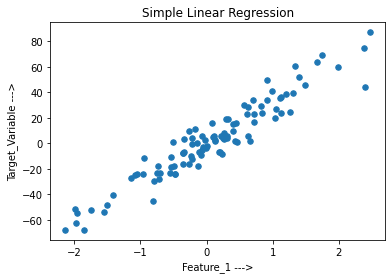

[[ 0.52804151]
 [30.65896337]]
Before adding x0:
 [[-2]
 [ 4]]
After adding x0:
 [[ 1. -2.]
 [ 1.  4.]]
[[-60.78988524]
 [123.16389501]]


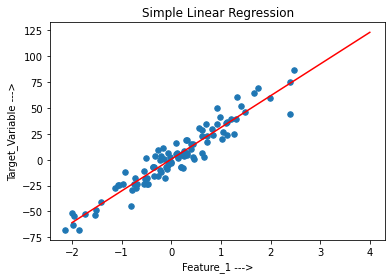

In [19]:

#Source: https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/?ref=lbp
#Noormal Equation is an analytical approach to Linear Regression with a Least Square Cost Function. 
#We can directly find out the value of θ without using Gradient Descent. 

# import required modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
 
# Create data set.
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,noise = 10,random_state=10)
 
# Plot the generated data set.
plt.scatter(x,y,s=30,marker='o')
plt.xlabel("Feature_1 --->")
plt.ylabel("Target_Variable --->")
plt.title('Simple Linear Regression')
plt.show()
 
# Convert  target variable array from 1d to 2d.
y=y.reshape(100,1)


# code
 
# Adding x0=1 to each instance
x_new=np.array([np.ones(len(x)),x.flatten()]).T
 
# Using Normal Equation.
theta_best_values=np.linalg.inv(x_new.T.dot(x_new)).dot(x_new.T).dot(y)
 
# Display best values obtained.
print(theta_best_values)


# code
 
# sample data instance.
x_sample=np.array([[-2],[4]])
 
# Adding x0=1 to each instance.
x_sample_new=np.array([np.ones(len(x_sample)),x_sample.flatten()]).T
 
# Display the sample.
print("Before adding x0:\n",x_sample)
print("After adding x0:\n",x_sample_new)


# code
# predict the values for given data instance.
predict_value=x_sample_new.dot(theta_best_values)
print(predict_value)

# code
 
# Plot the output.
plt.scatter(x,y,s=30,marker='o')
plt.plot(x_sample,predict_value,c='red')
plt.plot()
plt.xlabel("Feature_1 --->")
plt.ylabel("Target_Variable --->")
plt.title('Simple Linear Regression')
plt.show()

# Implementation of gradient descent in linear regression

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


100 epochs elapsed
Current accuracy is : 0.9836456109008862
Do you want to stop (y/*)??y


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:91: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


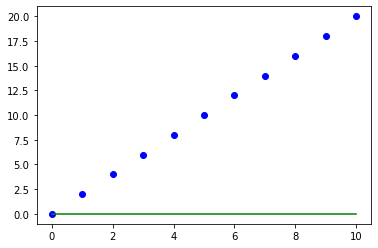

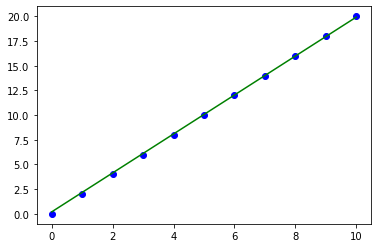

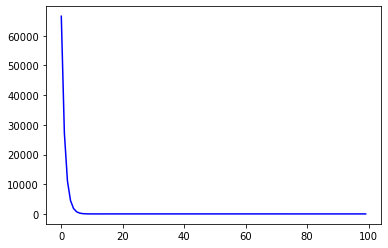

In [20]:
#Source: https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/?ref=lbp
import numpy as np
import matplotlib.pyplot as plt
 
class Linear_Regression:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.b = [0, 0]
     
    def update_coeffs(self, learning_rate):
        Y_pred = self.predict()
        Y = self.Y
        m = len(Y)
        self.b[0] = self.b[0] - (learning_rate * ((1/m) *
                                np.sum(Y_pred - Y)))
 
        self.b[1] = self.b[1] - (learning_rate * ((1/m) *
                                np.sum((Y_pred - Y) * self.X)))
 
    def predict(self, X=[]):
        Y_pred = np.array([])
        if not X: X = self.X
        b = self.b
        for x in X:
            Y_pred = np.append(Y_pred, b[0] + (b[1] * x))
 
        return Y_pred
     
    def get_current_accuracy(self, Y_pred):
        p, e = Y_pred, self.Y
        n = len(Y_pred)
        return 1-sum(
            [
                abs(p[i]-e[i])/e[i]
                for i in range(n)
                if e[i] != 0]
        )/n
    #def predict(self, b, yi):
 
    def compute_cost(self, Y_pred):
        m = len(self.Y)
        J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
        return J
 
    def plot_best_fit(self, Y_pred, fig):
                f = plt.figure(fig)
                plt.scatter(self.X, self.Y, color='b')
                plt.plot(self.X, Y_pred, color='g')
                f.show()
 
 
def main():
    X = np.array([i for i in range(11)])
    Y = np.array([2*i for i in range(11)])
 
    regressor = Linear_Regression(X, Y)
 
    iterations = 0
    steps = 100
    learning_rate = 0.01
    costs = []
     
    #original best-fit line
    Y_pred = regressor.predict()
    regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')
     
 
    while 1:
        Y_pred = regressor.predict()
        cost = regressor.compute_cost(Y_pred)
        costs.append(cost)
        regressor.update_coeffs(learning_rate)
         
        iterations += 1
        if iterations % steps == 0:
            print(iterations, "epochs elapsed")
            print("Current accuracy is :",
                regressor.get_current_accuracy(Y_pred))
 
            stop = input("Do you want to stop (y/*)??")
            if stop == "y":
                break
 
    #final best-fit line
    regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')
 
    #plot to verify cost function decreases
    h = plt.figure('Verification')
    plt.plot(range(iterations), costs, color='b')
    h.show()
 
    # if user wants to predict using the regressor:
    regressor.predict([i for i in range(10)])
 
if __name__ == '__main__':
    main()

_______________________________________________________________________________________________________________________